In [2]:
import re
import sys
from time import sleep
from pprint import pprint
from functools import partial

import numpy as np
import optuna
try:
    import pandas as pd
except:
    pass


FILENAME = "trial171.cpp"

In [4]:
#!cp 9711.cpp {FILENAME}

In [5]:
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out

trial171.cpp:465: warning: ignoring #pragma warning  [-Wunknown-pragmas]
  465 | #pragma warning( disable : 4146 )
      | 
trial171.cpp: In member function ‘void UltimateEstimator::Step()’:
trial171.cpp:1161:39: warning: comparison of integer expressions of different signedness: ‘signed char’ and ‘std::array<double, 60>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
 1161 |   for (auto col = (signed char)0; col < data_x.size(); col++) {
      |                                   ~~~~^~~~~~~~~~~~~~~
trial171.cpp:1119:8: warning: unused variable ‘estimated_distance’ [-Wunused-variable]
 1119 |   auto estimated_distance = 0.0;
      |        ^~~~~~~~~~~~~~~~~~
trial171.cpp: In member function ‘void Explorer::Step()’:
trial171.cpp:1502:30: warning: narrowing conversion of ‘(((int)v.Explorer::Node::y) + 1)’ from ‘int’ to ‘signed char’ [-Wnarrowing]
 1502 |     const auto u = Node{ v.y + (i8)1, v.x, false };
      |                          ~~~~^~~~~~~
trial171.cpp:1515:35: warning: 

In [6]:
N_TESTCASES = 1000

In [7]:
%%time
# 裏でも動かしてるので遅い
scores = []
for i in range(N_TESTCASES):
    i = f"{i:04d}"
    score = !cargo run --release --manifest-path ../tools/Cargo.toml --bin tester in/{i}.txt $(pwd)/{FILENAME}.out 2>&1 | grep Score
    print(i, *score)
    score = int(score[0].split()[-1])
    scores.append(score)
np.mean(scores) / 1e6, np.std(scores) / 1e6

0000 Score = 966979749
0001 Score = 965206069
0002 Score = 963199307
0003 Score = 963195391
0004 Score = 976072350
0005 Score = 980439664
0006 Score = 982812449
0007 Score = 985175643
0008 Score = 968997241
0009 Score = 968589005
0010 Score = 969222311
0011 Score = 956463884
0012 Score = 986082930
0013 Score = 969598726
0014 Score = 983139656
0015 Score = 934750594
0016 Score = 970327024
0017 Score = 969212375
0018 Score = 985098269
0019 Score = 978520925
0020 Score = 984521690
0021 Score = 946716320
0022 Score = 971141948
0023 Score = 957518176
0024 Score = 955323252
0025 Score = 962002241
0026 Score = 972864400
0027 Score = 957578110
0028 Score = 962074749
0029 Score = 962647125
0030 Score = 958422754
0031 Score = 978644369
0032 Score = 962466641
0033 Score = 978674407
0034 Score = 969901516
0035 Score = 972800393
0036 Score = 958535791
0037 Score = 982059269
0038 Score = 983386993
0039 Score = 966941528
0040 Score = 947237632
0041 Score = 974932780
0042 Score = 962011827
0043 Score 

0357 Score = 961692316
0358 Score = 979928549
0359 Score = 943735899
0360 Score = 967328137
0361 Score = 963884315
0362 Score = 982948951
0363 Score = 980664347
0364 Score = 968784486
0365 Score = 980485396
0366 Score = 964703829
0367 Score = 985717217
0368 Score = 973226720
0369 Score = 974115178
0370 Score = 976368931
0371 Score = 967203503
0372 Score = 965944228
0373 Score = 976146275
0374 Score = 983107358
0375 Score = 972772645
0376 Score = 967579076
0377 Score = 967734448
0378 Score = 945213874
0379 Score = 978716029
0380 Score = 955068953
0381 Score = 985145306
0382 Score = 981680624
0383 Score = 947754222
0384 Score = 964103615
0385 Score = 979905692
0386 Score = 965616628
0387 Score = 960441776
0388 Score = 982274674
0389 Score = 966288171
0390 Score = 958833754
0391 Score = 945263607
0392 Score = 947988473
0393 Score = 981559007
0394 Score = 973645336
0395 Score = 962911804
0396 Score = 976742611
0397 Score = 968619957
0398 Score = 954217107
0399 Score = 983507794
0400 Score 

0714 Score = 985450566
0715 Score = 970376538
0716 Score = 978564236
0717 Score = 973750446
0718 Score = 979131905
0719 Score = 978028401
0720 Score = 975516034
0721 Score = 972348898
0722 Score = 966089238
0723 Score = 964700515
0724 Score = 967377680
0725 Score = 964629856
0726 Score = 969637492
0727 Score = 970858742
0728 Score = 982288475
0729 Score = 963433925
0730 Score = 976250935
0731 Score = 984395831
0732 Score = 970634856
0733 Score = 975280922
0734 Score = 986886295
0735 Score = 956606266
0736 Score = 964744682
0737 Score = 961634626
0738 Score = 967544808
0739 Score = 984227066
0740 Score = 969592466
0741 Score = 964607867
0742 Score = 977413200
0743 Score = 975134219
0744 Score = 973115200
0745 Score = 988250543
0746 Score = 963368190
0747 Score = 963730526
0748 Score = 969009058
0749 Score = 969709776
0750 Score = 980024709
0751 Score = 984588335
0752 Score = 963776439
0753 Score = 986025926
0754 Score = 955660283
0755 Score = 975058782
0756 Score = 953098025
0757 Score 

(971.624973391, 10.189866106969143)

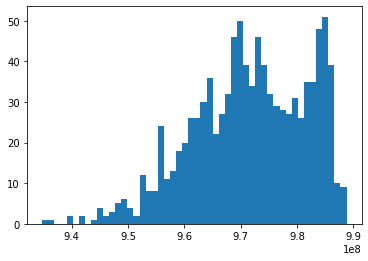

In [8]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)
plt.show()